In [472]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date,datetime

from tqdm import tqdm, tqdm_notebook

from sklearn.model_selection import train_test_split

print("Setup complete")

Setup complete


In [2]:
caudal_data = pd.read_csv('/Users/juanjosegranier/Downloads/caudal_extra.csv')

In [3]:
Y = 2000 # dummy leap year to allow input X-02-29 (leap day)
seasons = [('verano', (date(Y,  1,  1),  date(Y,  3, 20))),
           ('otono', (date(Y,  3, 21),  date(Y,  6, 20))),
           ('invierno', (date(Y,  6, 21),  date(Y,  9, 20))),
           ('primavera', (date(Y,  9, 21),  date(Y, 12, 20))),
           ('verano', (date(Y, 12, 21),  date(Y, 12, 31)))]

def get_season(now):
    if isinstance(now, datetime):
        now = now.date()
    now = now.replace(year=Y)
    return next(season for season, (start, end) in seasons
                if start <= now <= end)

In [5]:
caudal = caudal_data.copy()
caudal['fecha'] = pd.to_datetime(caudal_data['fecha'])
caudal['season'] = caudal['fecha'].apply(get_season)

In [47]:
#print(caudal['season'])

0             verano
1              otono
2              otono
3           invierno
4           invierno
5           invierno
6           invierno
7          primavera
8          primavera
9          primavera
10            verano
11            verano
12             otono
13             otono
14          invierno
15          invierno
16          invierno
17          invierno
18         primavera
19         primavera
20         primavera
21          invierno
22          invierno
23          invierno
24          invierno
25          invierno
26         primavera
27         primavera
28         primavera
29            verano
             ...    
1411150    primavera
1411151    primavera
1411152        otono
1411153     invierno
1411154     invierno
1411155        otono
1411156    primavera
1411157    primavera
1411158    primavera
1411159    primavera
1411160    primavera
1411161       verano
1411162       verano
1411163       verano
1411164        otono
1411165     invierno
1411166     i

In [53]:
estaciones0 = caudal.codigo_estacion.unique()
estaciones = estaciones0.tolist()
temporadas = ['verano','otono','invierno','primavera']

In [185]:
x_caudal = [[0 for i in range(133)] for i in range(4)]
x_temp =[[0 for i in range(133)] for i in range(4)]
x_precip = [[0 for i in range(133)] for i in range(4)]

for estacion in estaciones:
    for temporada in temporadas:
        caudalis = caudal.loc[caudal.codigo_estacion == estacion]
        caudalis2 = caudalis.loc[caudalis.season == temporada]
        i = temporadas.index(temporada)
        j = estaciones.index(estacion)
        x_caudal[i][j] = np.percentile(caudalis2['caudal'],95)
        x_temp[i][j] = np.percentile(caudalis2['temp_max_promedio'],95)
        x_precip[i][j] = np.percentile(caudalis2['precip_promedio'],95)

In [169]:
caudal['p95c'] = ''
caudal['p95p'] = ''
caudal['p95t'] = ''





        




In [174]:
def p95_caudal(estacion):
    i = estaciones.index(estacion)
    return [x_caudal[0][i], x_caudal[1][i], x_caudal[2][i], x_caudal[3][i]]

def p95_temp(estacion):
    i = estaciones.index(estacion)
    return [x_temp[0][i],  x_temp[1][i], x_temp[2][i], x_temp[3][i]]

def p95_precip(estacion):
    i = estaciones.index(estacion)
    return [ x_precip[0][i], x_precip[1][i], x_precip[2][i] , x_precip[3][i]]
    





In [188]:
caudal['p95c'] = caudal['codigo_estacion'].apply(p95_caudal)
caudal['p95t'] = caudal['codigo_estacion'].apply(p95_temp)
caudal['p95p'] = caudal['codigo_estacion'].apply(p95_precip)


In [209]:
def elemento(a,b):
    i = temporadas.index(b)
    return a[i]


In [213]:

tqdm_notebook().pandas()

caudal['p95cdef'] = caudal.progress_apply(lambda row: elemento(row['p95c'], row['season']), axis = 1)




In [214]:
caudal['p95tdef'] = caudal.progress_apply(lambda row: elemento(row['p95t'], row['season']), axis = 1 )

In [216]:
caudal['p95pdef'] = caudal.progress_apply(lambda row: elemento(row['p95p'], row['season']), axis = 1)



In [220]:
def extremo(a,b):
    if a >= b:
        return 1
    else:
        return 0
    

In [221]:
caudal['caudal_extremo'] = caudal.progress_apply(lambda row: extremo(row['caudal'], row['p95cdef']), axis = 1)


In [222]:
caudal['temp_extremo'] = caudal.progress_apply(lambda row: extremo(row['temp_max_promedio'], row['p95tdef']), axis = 1)

In [223]:
caudal['precip_extremo'] = caudal.progress_apply(lambda row: extremo(row['precip_promedio'], row['p95pdef']), axis = 1)

In [338]:
caudal['year'] = caudal.progress_apply(lambda row: row['fecha'].year, axis = 1)

In [352]:
def evento(a):
    if pd.notna(a) == True:
        return 1
    else:
        return 0  

In [353]:
caudal['caudalevento'] = caudal.progress_apply(lambda row: evento(row['caudal']), axis = 1)
caudal['tempevento'] = caudal.progress_apply(lambda row: evento(row['temp_max_promedio']), axis = 1)
caudal['precipevento'] = caudal.progress_apply(lambda row: evento(row['precip_promedio']), axis = 1)



In [438]:
x2_caudal = [0 for i in range(59)]
x2_temp = [0 for i in range(59)]
x2_prep = [0 for i in range(59)]

y2_caudal = [0 for i in range(59)]
y2_temp = [0 for i in range(59)]
y2_prep = [0 for i in range(59)]

z2_caudal = [0 for i in range(59)]
z2_temp = [0 for i in range(59)]
z2_prep = [0 for i in range(59)]







In [467]:
hola_caudal = caudal.groupby('year').caudalevento.value_counts().sort_index()
hola_temp = caudal.groupby('year').tempevento.value_counts().sort_index()
hola_prep = caudal.groupby('year').precipevento.value_counts().sort_index()
hola2_caudal = caudal.groupby('year').caudal_extremo.value_counts().sort_index()
hola2_temp = caudal.groupby('year').temp_extremo.value_counts().sort_index()
hola2_prep = caudal.groupby('year').precip_extremo.value_counts().sort_index()

In [468]:
for i in range(59):
    x2_caudal[i] = hola_caudal[i]
    x2_temp[i] = hola_temp[i]
    x2_prep[i] = hola_prep[i]
    y2_caudal[i] = hola2_caudal[2*i+1]
    y2_temp[i] = hola2_temp[2*i + 1]
    y2_prep[i] = hola2_prep[2*i+1]
    z2_caudal[i] = (y2_caudal[i]/x2_caudal[i])*100
    z2_temp[i] = (y2_temp[i]/x2_temp[i])*100
    z2_prep[i] = (y2_prep[i]/x2_prep[i])*100

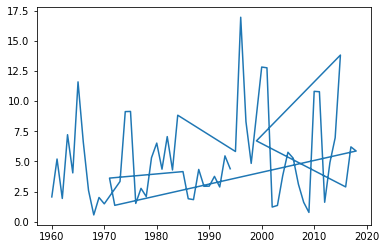

In [469]:
plt.plot(years,z2_caudal)


In [473]:
train, test = train_test_split(caudal, test_size=0.3)